In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [16]:
df = pd.read_csv('건물_30년 이하.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,25,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,18000
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,55200
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,14,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,36800
3,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,67600
4,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,30300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470266,강서구,2022-12-31,84.98,15,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,5,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,113500
470267,서초구,2022-12-31,152.33,9,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,18,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,250000
470268,송파구,2022-12-31,84.90,24,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,14,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,172000
470269,양천구,2022-12-31,64.02,5,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,26,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,37000


In [17]:
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리', '부동산거래량', 
         '회사채3년(평균)', '환율종가', '금값종가','LTV','물건금액(만원)']]

In [18]:
df

,자치구,계약일,건물면적(㎡),층,Fed기준금리,부동산거래량,회사채3년(평균),환율종가,금값종가,LTV,물건금액(만원)
0,노원구,2016-01-01,39.96,10,0.34,9894,2.1,1175.45,1060.74,0.7,18000
1,성동구,2016-01-01,75.37,10,0.34,9894,2.1,1175.45,1060.74,0.7,55200
2,금천구,2016-01-01,84.83,3,0.34,9894,2.1,1175.45,1060.74,0.7,36800
3,은평구,2016-01-01,101.97,9,0.34,9894,2.1,1175.45,1060.74,0.7,67600
4,노원구,2016-01-01,84.59,10,0.34,9894,2.1,1175.45,1060.74,0.7,30300
...,...,...,...,...,...,...,...,...,...,...,...
470266,강서구,2022-12-31,84.98,15,4.10,3698,5.3,1260.92,1824.40,0.2,113500
470267,서초구,2022-12-31,152.33,9,4.10,3698,5.3,1260.92,1824.40,0.0,250000
470268,송파구,2022-12-31,84.90,24,4.10,3698,5.3,1260.92,1824.40,0.0,172000
470269,양천구,2022-12-31,64.02,5,4.10,3698,5.3,1260.92,1824.40,0.4,37000


In [19]:
# Train : 2016-2020
# Test : 2021-2022

# 시계열
df['계약일'] = pd.to_datetime(df['계약일'])

train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']

In [20]:
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]

In [21]:
scaler = MinMaxScaler()
scaler
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# DT 모델

In [30]:
# dt 회귀 모델 초기화
model = DecisionTreeRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))

Test set MSE: 0.030806851632748638
Test set RMSE: 0.17551880706280065


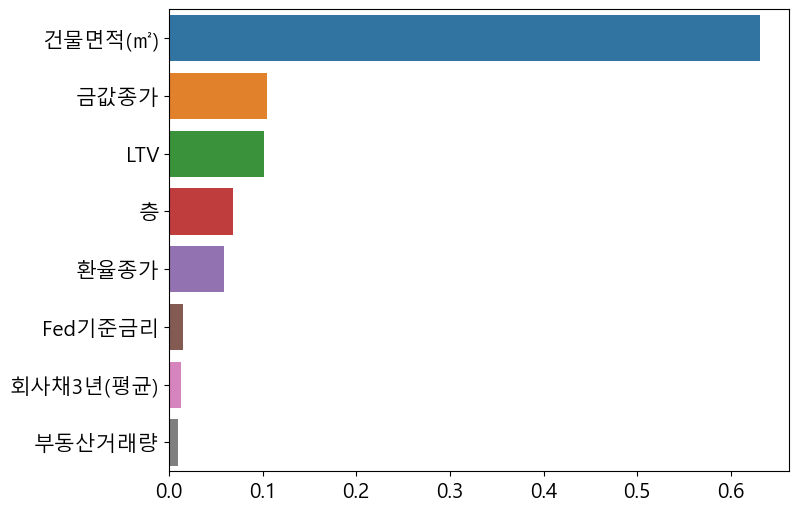

In [31]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# RF 모델

In [24]:
# 랜덤 포레스트 회귀 모델 초기화
model = RandomForestRegressor(random_state =1 , n_jobs = -1)

# 모델 학습
model.fit(X_train, y_train)


# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))

Test set MSE: 0.01606074691754321
Test set RMSE: 0.12673100219576586


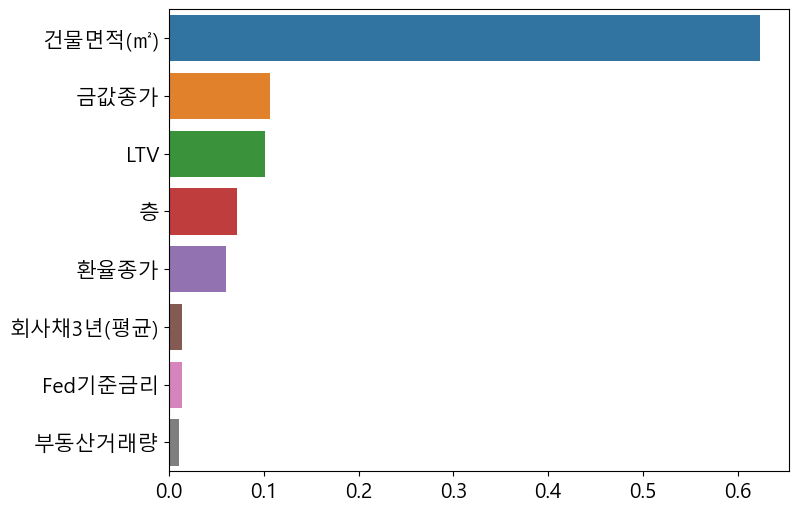

In [25]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# XGB 모델

In [28]:
# 랜덤 포레스트 회귀 모델 초기화
model = xgb.XGBRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))

Test set MSE: 0.016436412556583437
Test set RMSE: 0.12820457307203764


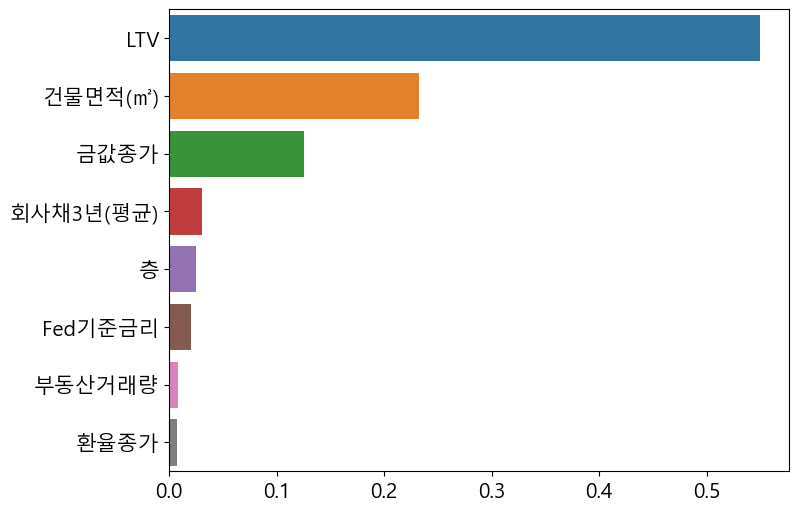

In [29]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()